In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaneddataset.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    object 
 11  Region       244 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 23.0+ KB


In [7]:
df.columns.str.strip()

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
df['Classes']=df['Classes'].str.replace(" ","")

In [14]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0


In [21]:
df['Classes']=np.where(df['Classes'].str.contains('notfire'),0,1)

In [22]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [23]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [24]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col = corr_matrix.columns[i]
                col_corr.add(col)

    return col_corr

In [27]:
corr_f=correlation(X_train,0.85)

In [28]:
corr_f

{'BUI', 'DC'}

In [29]:
X_train.drop(corr_f,axis=1,inplace=True)
X_test.drop(corr_f,axis=1,inplace=True)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x1371b12a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1371b18a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1371b0fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x1371b1ea0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1371b21a0>,
 'means': []}

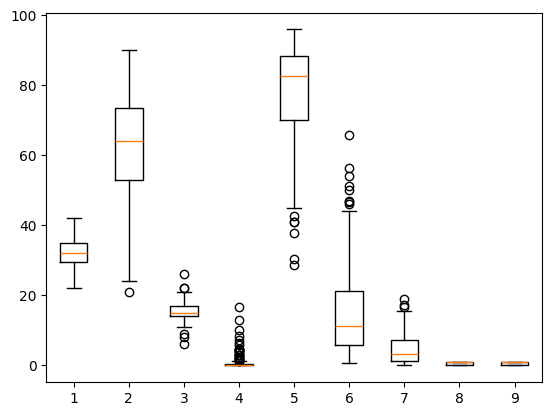

In [32]:
plt.boxplot(X_train)

{'whiskers': [<matplotlib.lines.Line2D at 0x13743a350>,
 'caps': [<matplotlib.lines.Line2D at 0x13743a950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1352af100>,
 'medians': [<matplotlib.lines.Line2D at 0x13743af50>,
 'fliers': [<matplotlib.lines.Line2D at 0x13743b250>,
 'means': []}

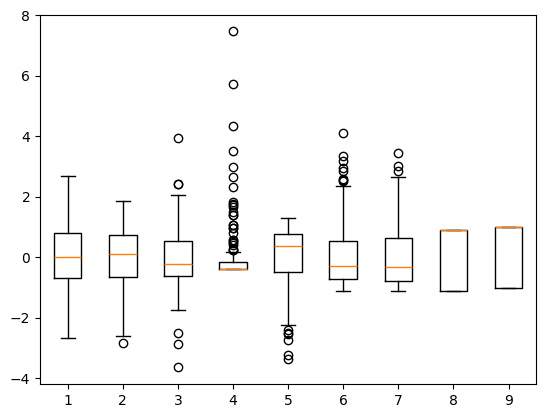

In [33]:
plt.boxplot(X_train_scaled)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_predict=lr.predict(X_test_scaled)

In [35]:
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_predict)
score=r2_score(y_test,y_predict)


In [36]:
mae

0.6075669665526342

In [37]:
score

0.9888523587097926

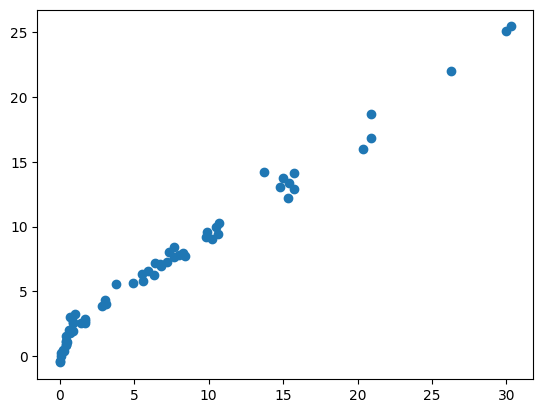

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae1=mean_absolute_error(y_test,y_pred)
score1=r2_score(y_test,y_pred)

In [40]:
score1

0.9498780896144685

/Users/kanwal/Desktop/Code/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kanwal/Desktop/Code/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kanwal/Desktop/Code/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


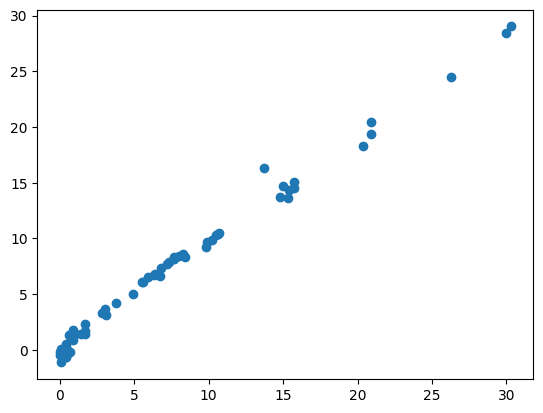

In [41]:
from sklearn.linear_model import Ridge
rig=Ridge()
rig.fit(X_train_scaled,y_train)
y_pred1=rig.predict(X_test_scaled)
plt.scatter(y_test,y_pred1)
mae2=mean_absolute_error(y_test,y_pred1)
score2=r2_score(y_test,y_pred1)

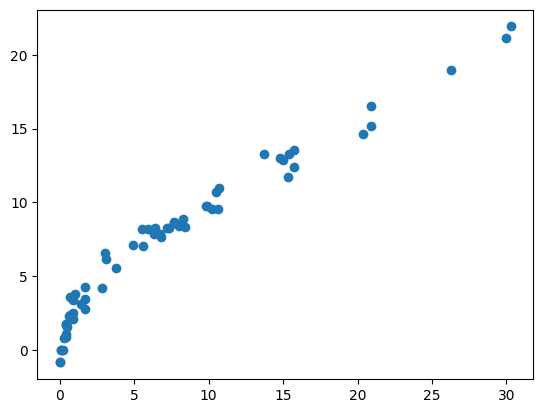

In [42]:
from sklearn.linear_model import ElasticNet
el=ElasticNet()
el.fit(X_train_scaled,y_train)
y_prd=el.predict(X_test_scaled)
plt.scatter(y_test,y_prd)
mae3=mean_absolute_error(y_test,y_prd)
score3=r2_score(y_test,y_prd)

0.9879350695757396


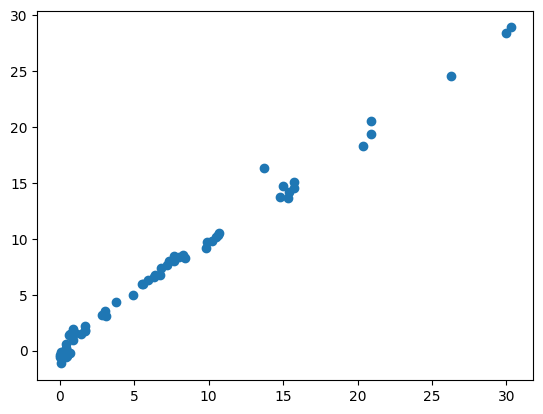

In [48]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae1=mean_absolute_error(y_test,y_pred)
score1=r2_score(y_test,y_pred)
print(score1)

In [46]:
lassocv.alpha_

np.float64(0.026808871166009655)

0.9881590396930044


/Users/kanwal/Desktop/Code/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kanwal/Desktop/Code/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kanwal/Desktop/Code/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


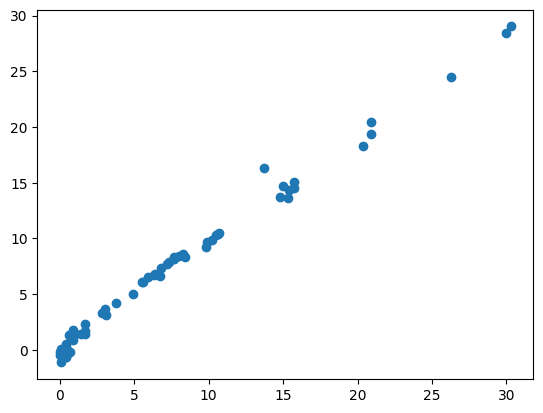

In [51]:
from sklearn.linear_model import RidgeCV
rigcv=RidgeCV()
rigcv.fit(X_train_scaled,y_train)
y_pred1=rigcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred1)
mae2=mean_absolute_error(y_test,y_pred1)
score2=r2_score(y_test,y_pred1)
print(score2)

0.874882424178001


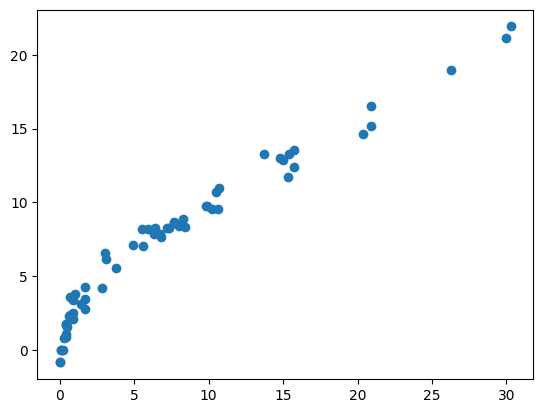

In [53]:
from sklearn.linear_model import ElasticNetCV
elcv=ElasticNet()
elcv.fit(X_train_scaled,y_train)
y_prd=elcv.predict(X_test_scaled)
plt.scatter(y_test,y_prd)
mae3=mean_absolute_error(y_test,y_prd)
score3=r2_score(y_test,y_prd)
print(score3)

In [54]:
scaler

StandardScaler()

In [56]:
rig

Ridge()

In [57]:
import pickle

In [59]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rig,open('rig.pkl','wb'))
